In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

## Read Train data

In [2]:
train = pd.read_csv('train.csv')
train.shape
print(train.head())

# Here the Label is the output and all other are the features

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

## Read Test Data

In [3]:
test = pd.read_csv('test.csv')
test.shape
print(test.head())

# Here we are having only features, no label as it is a test set

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

## Dividing the Training set into X_Train and Y_Train

In [4]:
Y_Train = train['label']
X_Train = train.drop(labels=["label"], axis = 1)

In [5]:
X_Train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_Train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
Y_Train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## Plot Some Examples

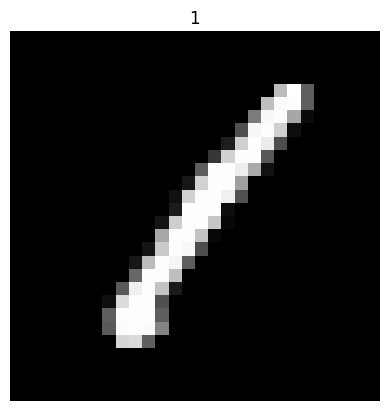

In [8]:
#img = X_train.iloc[0].as_matrix()
img = X_Train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

#“landmarks = landmarks_frame.iloc[n, 1:].as_matrix()”
#The above code runs with errors.

#The version of pandas is 1.0.1.
#Replace ‘as_matrix()’ with ‘to_numpy()’ and the problem is solved.

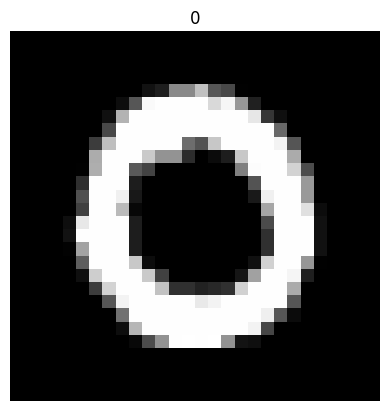

In [9]:
#img = X_train.iloc[0].as_matrix()
img = X_Train.iloc[1].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[1,0])
plt.axis("off")
plt.show()

#“landmarks = landmarks_frame.iloc[n, 1:].as_matrix()”
#The above code runs with errors.

#The version of pandas is 1.0.1.
#Replace ‘as_matrix()’ with ‘to_numpy()’ and the problem is solved.

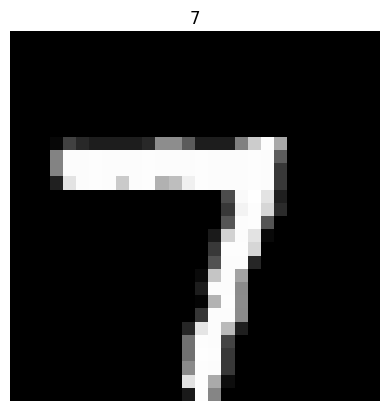

In [10]:
#img = X_train.iloc[0].as_matrix()
img = X_Train.iloc[226].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[226,0])
plt.axis("off")
plt.show()

#“landmarks = landmarks_frame.iloc[n, 1:].as_matrix()”
#The above code runs with errors.

#The version of pandas is 1.0.1.
#Replace ‘as_matrix()’ with ‘to_numpy()’ and the problem is solved.

## Normalization, Reshape and Label Encoding

### Normalization
#### * We perform a grayscale normalization to reduce the effect of illumination's differences.
#### * If we perform normalization, CNN works faster.
### Reshape
#### * Train and test images (28 x 28)
#### * We reshape all data to 28x28x1 3D matrices.
#### * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
### Label Encoding
#### * Encode labels to one hot vectors
#### * 2 => [0,0,1,0,0,0,0,0,0,0]
#### * 4 => [0,0,0,0,1,0,0,0,0,0]

## Normalize the Data

In [11]:
X_Train = X_Train / 255.0
test = test / 255.0
print("x_train shape: ",X_Train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


## Reshape

In [12]:
X_Train = X_Train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_Train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


## Train Test Split

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
Y_Train = to_categorical(Y_Train, num_classes = 10)

In [14]:
from sklearn.model_selection import train_test_split
X_Train, X_val, Y_Train, Y_val = train_test_split(X_Train, Y_Train, test_size = 0.1, random_state=2)
print("x_train shape",X_Train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_Train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


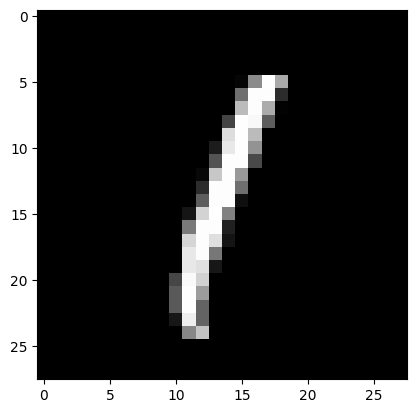

In [15]:
plt.imshow(X_Train[7][:,:,0],cmap='gray')
plt.show()

# CNN

In [16]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()

model.add(layers.Conv2D(8, (5, 5), activation='relu', input_shape=(28, 28, 1)))  # 8 filters of (5 x 5)
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(16, (3, 3), activation='relu'))  # 16 filters of (3 x 3)
model.add(layers.MaxPooling2D((2,2), strides = (2,2)))
model.add(layers.Dropout(0.25))
# strides=(2, 2) means that the convolutional filter moves 2 units at a time in both the horizontal (width) and vertical (height) directions.



In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)          0

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_Train, Y_Train, epochs=10, validation_data=(X_val, Y_val))


# If you are using one-hot encoding for your labels, you should use categorical_crossentropy as the loss function instead of 
# SparseCategoricalCrossentropy. The SparseCategoricalCrossentropy loss is suitable for integer-encoded class labels, whereas 
# CategoricalCrossentropy is used when the labels are one-hot encoded.

# Additionally, ensure that your labels (Y_Train and Y_val) are one-hot encoded. You can use the to_categorical function from Keras 
# to achieve this:

# from keras.utils import to_categorical
# Assuming Y_Train and Y_val are integer-encoded labels
# Y_Train_one_hot = to_categorical(Y_Train, num_classes)
# Y_val_one_hot = to_categorical(Y_val, num_classes)

Epoch 1/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.3743 - accuracy: 0.8798 - val_loss: 0.0955 - val_accuracy: 0.9698
Epoch 2/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.1441 - accuracy: 0.9548 - val_loss: 0.0683 - val_accuracy: 0.9762
Epoch 3/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.1150 - accuracy: 0.9648 - val_loss: 0.0570 - val_accuracy: 0.9817
Epoch 4/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.1009 - accuracy: 0.9687 - val_loss: 0.0482 - val_accuracy: 0.9845
Epoch 5/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0899 - accuracy: 0.9717 - val_loss: 0.0451 - val_accuracy: 0.9855
Epoch 6/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0819 - accuracy: 0.9736 - val_loss: 0.0447 - val_accuracy: 0.9864
Epoch 7/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0756 - accuracy: 0.9754 - val_loss: 0.0428 - val_accuracy:

132/132 - 0s - loss: 0.0392 - accuracy: 0.9893 - 229ms/epoch - 2ms/step


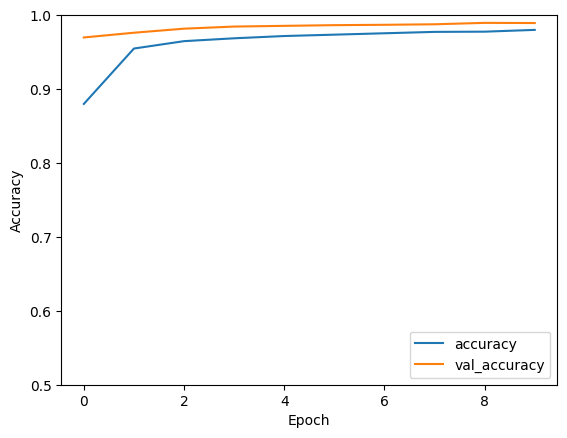

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_val,  Y_val, verbose=2)

In [21]:
print(test_acc)

0.9892857074737549


132/132 [==============================] - 0s 2ms/step


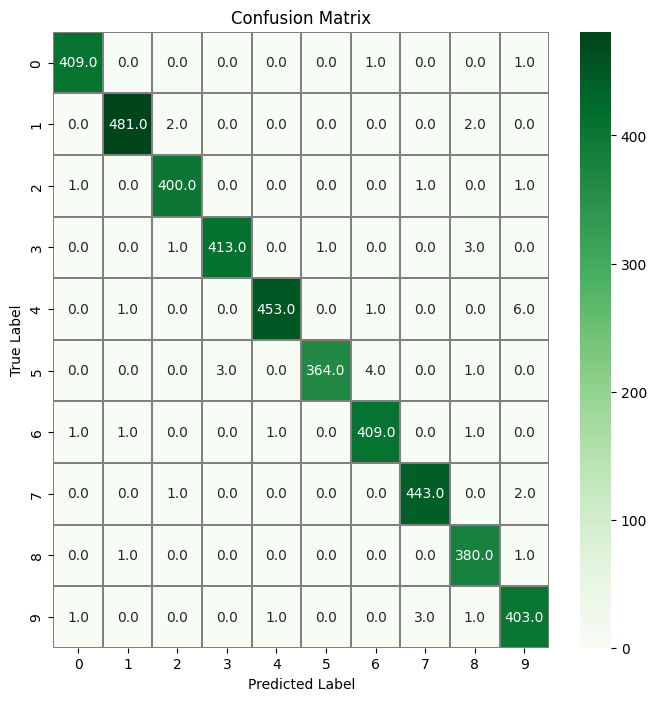

In [22]:
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# https://github.com/suneelbvs/Deep-Learning-Projects/blob/main/CNN%20Projects/Computer%20Vision%20Tasks/MNIST/Simple%20CNN%20Model%20with%20Nice%20Tutorial.ipynb